In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [4]:
df = pd.DataFrame({"A":[1,2,3], "B": [10,20,30]})
df

,A,B
0,1,10
1,2,20
2,3,30


In [16]:
def topla_10(x):
    return x + 10
    

In [42]:
df = df.apply(topla_10)
df

,A,B
0,61,70
1,62,80
2,63,90


In [43]:
df1 = pd.DataFrame({'A':[1, 2, np.nan],
                  'B':[5, np.nan, np.nan],
                  'C':[1, 2, 3]})

In [44]:
df1

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [45]:
df1.dropna(thresh=2) # satırda 2 tane üstü  Nan olanı siler

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [46]:
df1.dropna(thresh=2, axis = 1) # sütünda 2 tane ve üstü Nan olanı siler

,A,C
0,1.0,1
1,2.0,2
2,NaN,3


In [48]:
df1["A"].fillna(value = df1["A"].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [49]:
V1 = np.array([2,3,5,np.NaN,7,1,np.NaN,10,14])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,13,5,6,13,7,np.NaN,3,30])


In [50]:
df2 = pd.DataFrame(
        {"Var1" : V1,
         "Var2" : V2,
         "Var3" : V3})
df2

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [51]:
df2["Var1"].fillna(0)

0     2.0
1     3.0
2     5.0
3     0.0
4     7.0
5     1.0
6     0.0
7    10.0
8    14.0
Name: Var1, dtype: float64

In [52]:
df2["Var2"].fillna(df2["Var2"].mean())

0     8.000000
1     6.166667
2     5.000000
3     8.000000
4    11.000000
5     6.166667
6     6.166667
7     2.000000
8     3.000000
Name: Var2, dtype: float64

In [53]:
df2.apply(lambda x : x.fillna(x.mean()), axis=0)

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [54]:
df2["Var3"].fillna(df2["Var3"].median())

0     7.0
1    13.0
2     5.0
3     6.0
4    13.0
5     7.0
6     7.0
7     3.0
8    30.0
Name: Var3, dtype: float64

In [56]:
Var1 = np.array([1,3,6,np.NaN,7,1,9,np.NaN,15])
Var2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
Var3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
Var4 = np.array(["IT","IT","IT","HR","HR","HR","HR","IT","IT"])
df3 = pd.DataFrame(
        {"salary" : Var1,
         "Var2" : Var2,
         "Var3" : Var3,
         "department" : Var4}
)

df3

,salary,Var2,Var3,department
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IT
3,NaN,8.0,6.0,HR
4,7.0,12.0,14.0,HR
5,1.0,NaN,7.0,HR
6,9.0,NaN,NaN,HR
7,NaN,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [60]:
mean = df3.groupby("department")["salary"].mean()
mean

department
HR    5.666667
IT    6.250000
Name: salary, dtype: float64

In [62]:
df3["salary"].fillna(df3.groupby("department")["salary"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     5.666667
4     7.000000
5     1.000000
6     9.000000
7     6.250000
8    15.000000
Name: salary, dtype: float64

In [63]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"HR","HR","HR","HR",np.nan,"IT","HR"], dtype=object)
df4 = pd.DataFrame(
        {"salary" : V1,
        "department" : V4}
)
df4

,salary,department
0,1.0,IT
1,3.0,NaN
2,6.0,HR
3,NaN,HR
4,7.0,HR
5,1.0,HR
6,NaN,NaN
7,9.0,IT
8,15.0,HR


In [64]:
df4["department"].fillna(method = "ffill") # bir önceki değer ile doldurur

0    IT
1    IT
2    HR
3    HR
4    HR
5    HR
6    HR
7    IT
8    HR
Name: department, dtype: object

In [65]:
df4["department"].fillna(method = "bfill")# bir sonraki değer ile doldurur

0    IT
1    HR
2    HR
3    HR
4    HR
5    HR
6    IT
7    IT
8    HR
Name: department, dtype: object

In [67]:
df5 = sns.load_dataset("diamonds")
df5.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='table'>

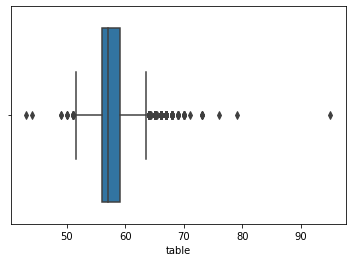

In [68]:
sns.boxplot(x = df5.table)